In [148]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import seaborn as sb
import matplotlib.pyplot as plt

TOPICS = {
    "topics.topic_0": "Command Line",
    "topics.topic_1": "Client-Server",
    "topics.topic_2": "Cloud",
    "topics.topic_3": "Resource Management",
    "topics.topic_4": "Error Handling & Logging"
}



In [112]:
df = pd.read_csv('full.csv')

In [113]:
df.drop(columns=['Unnamed: 0'], inplace=True)
for col in df.columns:
	if 'language' in col:
		df.drop(columns=[col], inplace=True)
df.describe()

,analyzed_paths,pairs,similarities,issues,commits,contributors,stars,topics.topic_3,topics.topic_0,topics.topic_1,loc.blank,loc.code,loc.comment,loc.nFiles,topics.topic_2,topics.topic_4
count,13703.000000,1.370300e+04,10467.000000,13703.000000,13703.000000,13703.000000,13703.000000,11468.000000,9266.000000,9049.000000,13703.000000,1.370300e+04,1.370300e+04,13703.000000,8324.000000,6996.000000
mean,76.884259,5.942503e+04,154.098596,174.068379,784.590309,26.883456,1160.930453,0.360950,0.279739,0.260759,10936.597023,8.822849e+04,1.700028e+04,350.551850,0.279741,0.319453
std,336.190415,1.930047e+06,1014.191085,1096.738333,3401.684323,96.088596,3632.434057,0.256544,0.213156,0.210155,42794.313040,3.295197e+05,9.286598e+04,1258.837789,0.237410,0.271506
min,2.000000,1.000000e+00,0.000000,0.000000,1.000000,-1.000000,101.000000,0.010099,0.010063,0.010016,10.000000,7.200000e+01,0.000000e+00,2.000000,0.010025,0.010026
25%,6.000000,1.500000e+01,7.000000,7.000000,65.000000,3.000000,159.000000,0.143918,0.108315,0.090124,255.000000,1.498000e+03,1.170000e+02,15.000000,0.084595,0.076527
50%,17.000000,1.360000e+02,30.000000,25.000000,173.000000,7.000000,286.000000,0.309139,0.228687,0.206502,755.000000,4.567000e+03,4.380000e+02,40.000000,0.209104,0.244908
75%,51.000000,1.275000e+03,117.000000,88.000000,513.000000,21.000000,731.000000,0.537906,0.408324,0.386560,3188.000000,2.098000e+04,2.306000e+03,145.000000,0.422939,0.519784
max,18370.000000,1.687193e+08,80513.000000,60246.000000,164293.000000,3927.000000,117805.000000,0.999101,0.999764,0.997521,827986.000000,6.593969e+06,2.693242e+06,33349.000000,0.996716,0.999707


In [114]:
epsilon = 1e-6
df['contributors'] = df['contributors'].apply(lambda x: x if x > 0 else epsilon)
df['commits'] = df['commits'].apply(lambda x: x if x > 0 else epsilon)
df['issues'] = df['issues'].apply(lambda x: x if x > 0 else epsilon)
df['stars'] = df['stars'].apply(lambda x: x if x > 0 else epsilon)
df['analyzed_paths'] = df['analyzed_paths'].apply(lambda x: x if x > 0 else epsilon)
df['pairs'] = df['pairs'].apply(lambda x: x if x > 0 else epsilon)
df['similarities'] = df['similarities'].apply(lambda x: x if x > 0 else epsilon)

# df2 = df.loc[:, ["similarities", "issues"]]
# 
# epsilon = 1e-9
# df2['issues'] = df2['issues'].apply(lambda x: x if x > 0 else epsilon)
# df2.corr()


In [115]:
df_nona = df.dropna()

X = df_nona[['stars', 'contributors', 'commits', 'pairs', 'analyzed_paths', 'issues']]
y = df_nona['similarities']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"Coefficients: {model.coef_}")
print(f"Intercept: {model.intercept_}")
df.head()

Mean Squared Error: 96836.40828933466
Coefficients: [ 1.12912796e-04  1.97676821e-01 -8.05711146e-04  4.06896989e-06
 -4.39483167e-02 -4.01863091e-02]
Intercept: 117.08980766371077


,repo_id,analyzed_paths,pairs,similarities,issues,license,commits,created_at,contributors,stars,topics.topic_3,topics.topic_0,topics.topic_1,loc.blank,loc.code,loc.comment,loc.nFiles,topics.topic_2,topics.topic_4
0,mislav/hub,46,1035,150.0,2018.000000,MIT,3337,2009-12-05,244.0,22649,0.692835,0.247408,0.058288,2539,12621,110,97,NaN,NaN
1,getlantern/lantern,893,398278,138.0,0.000001,NaN,6252,2011-02-17,59.0,13937,0.888254,NaN,0.106459,45439,425248,43672,1701,NaN,NaN
2,direnv/direnv,37,666,171.0,664.000000,MIT,1132,2011-01-04,213.0,11397,0.333218,0.591452,NaN,760,3971,327,64,0.074183,NaN
3,patrickmn/go-cache,2,1,248.0,92.000000,MIT,163,2012-01-02,7.0,7693,NaN,0.232586,0.029679,237,2759,213,4,NaN,0.734904
4,miekg/dns,39,741,1746.0,605.000000,BSD-3-Clause,4173,2010-08-03,227.0,7661,0.118695,0.071108,0.575756,3529,27510,2559,89,0.025523,0.208917


In [116]:
df['log_stars'] = np.log1p(df['stars'])
df['log_contributors'] = np.log1p(df['contributors'])
df['log_commits'] = np.log1p(df['commits'])
df['log_pairs'] = np.log1p(df['pairs'])
df['log_analyzed_paths'] = np.log1p(df['analyzed_paths'])
df['log_issues'] = np.log1p(df['issues'])

In [117]:
sample = df.sample(100)

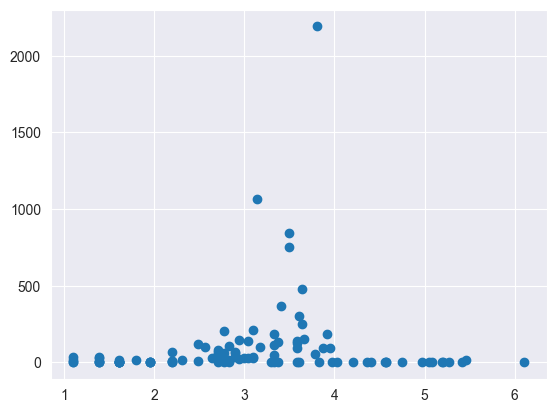

In [118]:
plt.scatter(sample['log_analyzed_paths'], sample['similarities'])

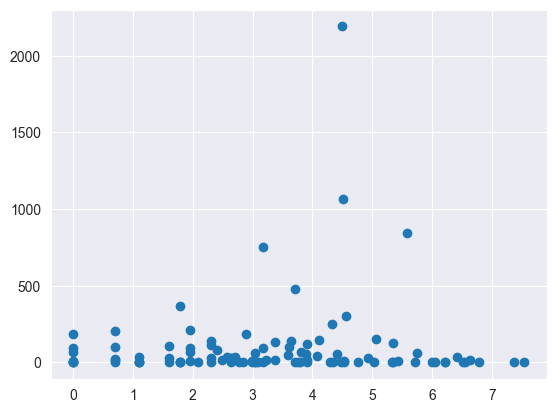

In [119]:
plt.scatter(sample['log_issues'], sample['similarities'])

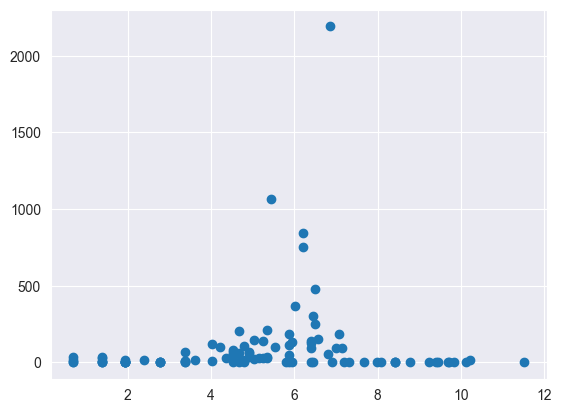

In [120]:
plt.scatter(sample['log_pairs'], sample['similarities'])

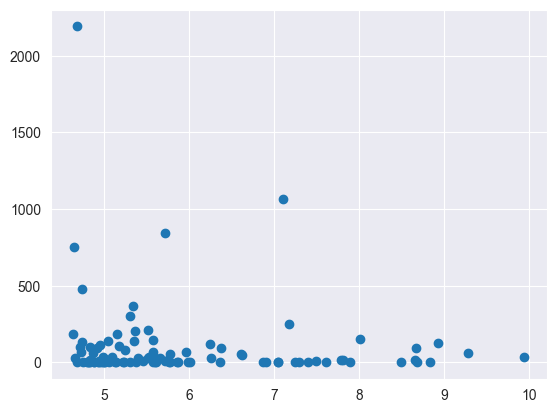

In [121]:
plt.scatter(sample['log_stars'], sample['similarities'])

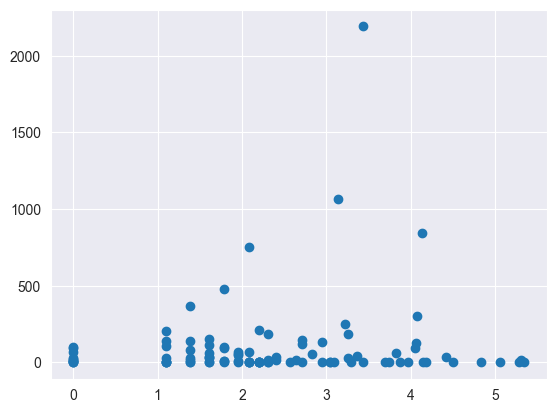

In [122]:
plt.scatter(sample['log_contributors'], sample['similarities'])

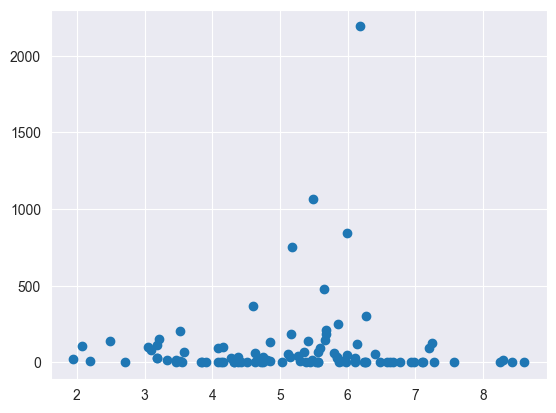

In [123]:
plt.scatter(sample['log_commits'], sample['similarities'])

In [124]:
reg_stars = np.polyfit(sample['log_stars'], sample['similarities'], deg = 1)
reg_stars

array([-22.28575133, 229.87121145])

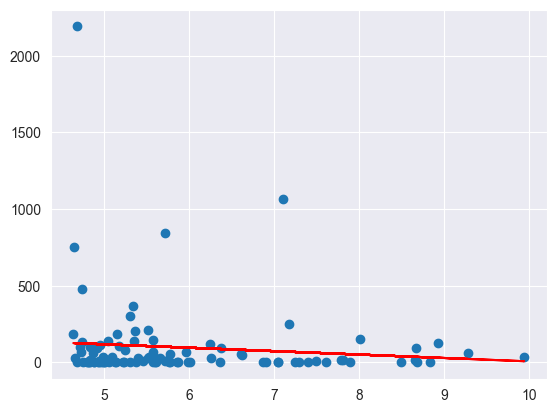

In [125]:
trend_stars = np.polyval(reg_stars, sample['log_stars'])
plt.scatter(sample['log_stars'], sample['similarities'])
plt.plot(sample['log_stars'], trend_stars, color='red')

In [126]:
reg_contributors = np.polyfit(sample['log_contributors'], sample['similarities'], deg = 1)
reg_contributors

array([23.48501417, 44.93716443])

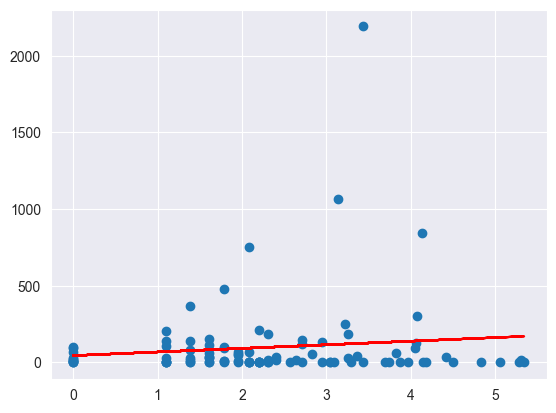

In [127]:
trend_contributors = np.polyval(reg_contributors, sample['log_contributors'])
plt.scatter(sample['log_contributors'], sample['similarities'])
plt.plot(sample['log_contributors'], trend_contributors, color='red')

In [128]:
reg_commits = np.polyfit(sample['log_commits'], sample['similarities'], deg = 1)
reg_commits

array([10.74195347, 42.81456378])

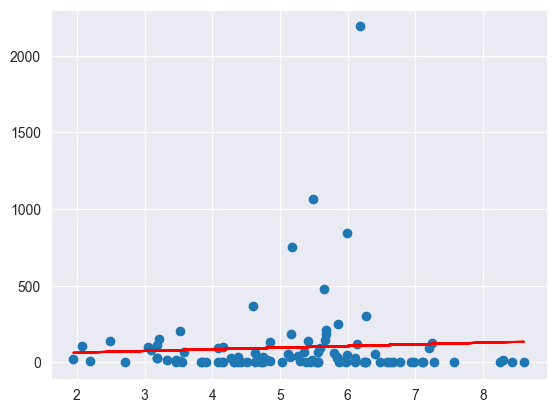

In [129]:
trend_commits = np.polyval(reg_commits, sample['log_commits'])
plt.scatter(sample['log_commits'], sample['similarities'])
plt.plot(sample['log_commits'], trend_commits, color='red')

In [130]:
reg_pairs = np.polyfit(sample['log_pairs'], sample['similarities'], deg = 1)
reg_pairs

array([12.09735032, 35.56585257])

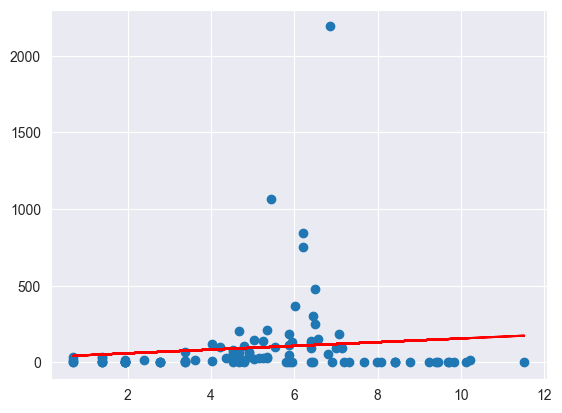

In [131]:
trend_pairs = np.polyval(reg_pairs, sample['log_pairs'])
plt.scatter(sample['log_pairs'], sample['similarities'])
plt.plot(sample['log_pairs'], trend_pairs, color='red')

In [132]:
reg_analyzed_paths = np.polyfit(sample['log_analyzed_paths'], sample['similarities'], deg = 1)
reg_analyzed_paths

array([24.29980978, 24.02517604])

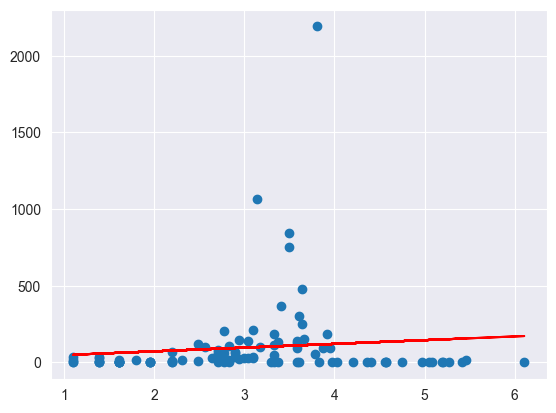

In [133]:
trend_analyzed_paths = np.polyval(reg_analyzed_paths, sample['log_analyzed_paths'])
plt.scatter(sample['log_analyzed_paths'], sample['similarities'])
plt.plot(sample['log_analyzed_paths'], trend_analyzed_paths, color='red')

In [134]:
reg_issues = np.polyfit(sample['log_issues'], sample['similarities'], deg = 1)
reg_issues

array([10.68487655, 62.94705388])

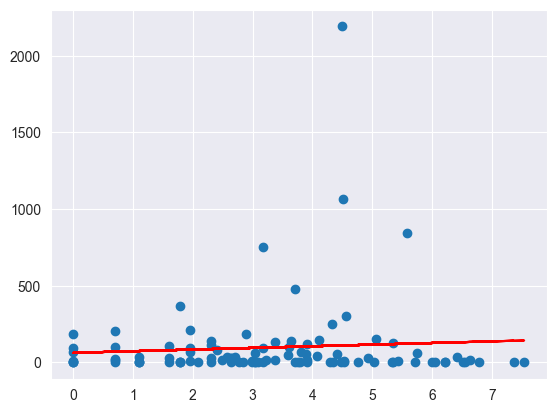

In [135]:
trend_issues = np.polyval(reg_issues, sample['log_issues'])
plt.scatter(sample['log_issues'], sample['similarities'])
plt.plot(sample['log_issues'], trend_issues, color='red')

<Axes: xlabel='log_stars', ylabel='similarities'>

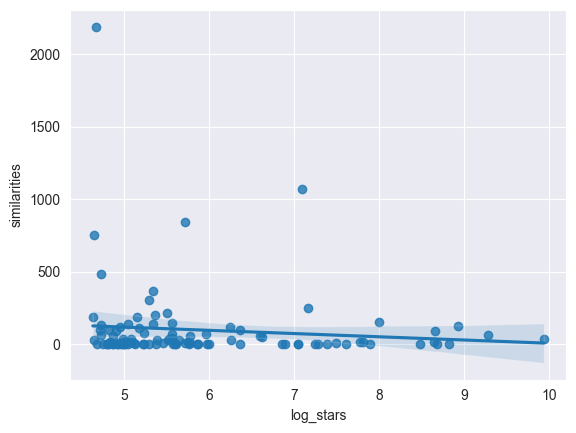

In [136]:
sb.regplot(x='log_stars', y='similarities', data=sample)

# Regression as a Technical Indicator

In [137]:
reg1 = np.polyfit(sample['log_stars'], sample['similarities'], deg = 1)
reg1

array([-22.28575133, 229.87121145])

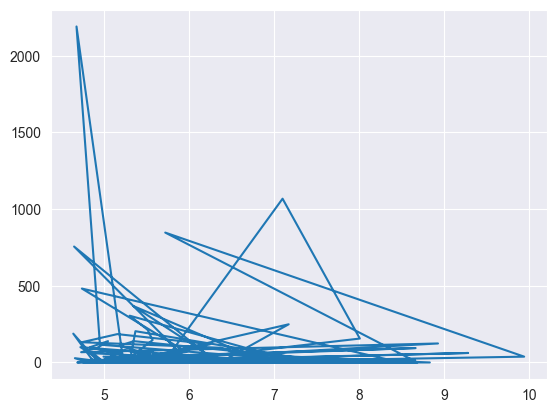

In [138]:
trend1 = np.polyval(reg1, sample['log_stars'][-63:])
std = sample['similarities'][-63:].std()
plt.plot(sample['log_stars'], sample['similarities'], label = 'Similarities')

## Correlation Analysis

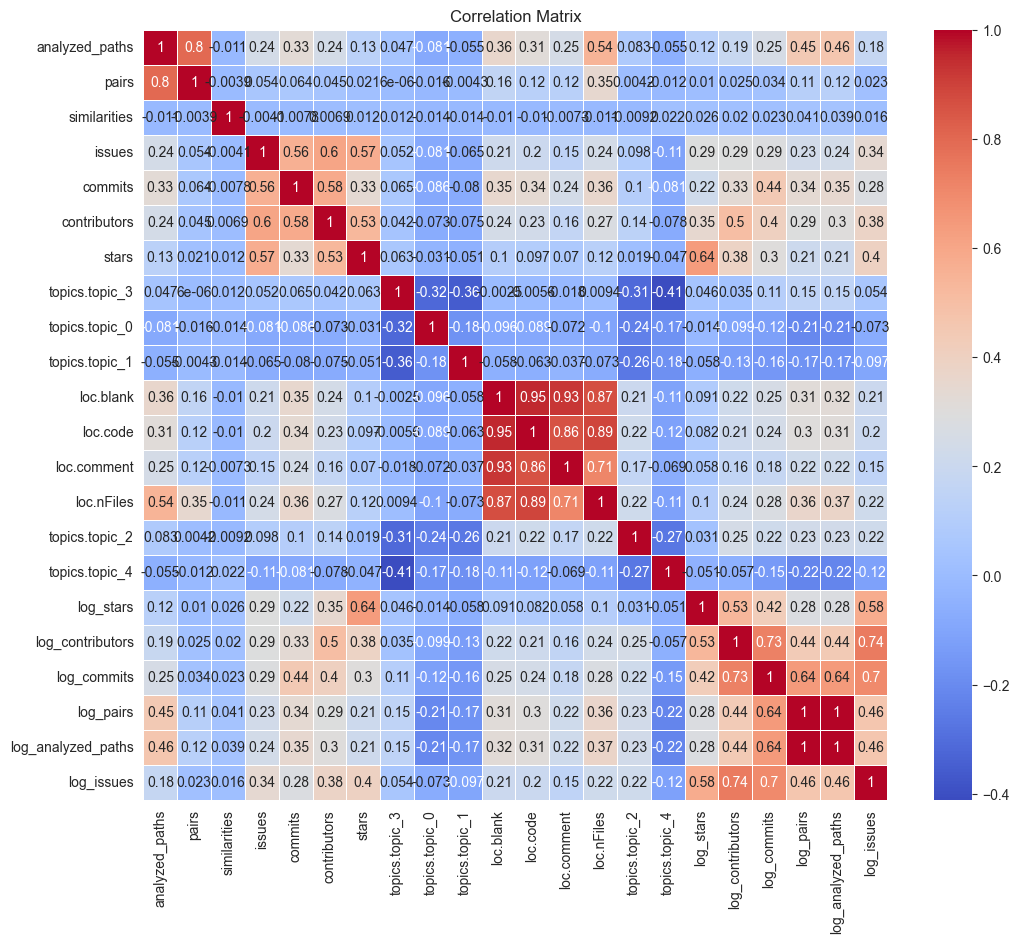

In [139]:
corr_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(12, 10))
sb.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Random Forest

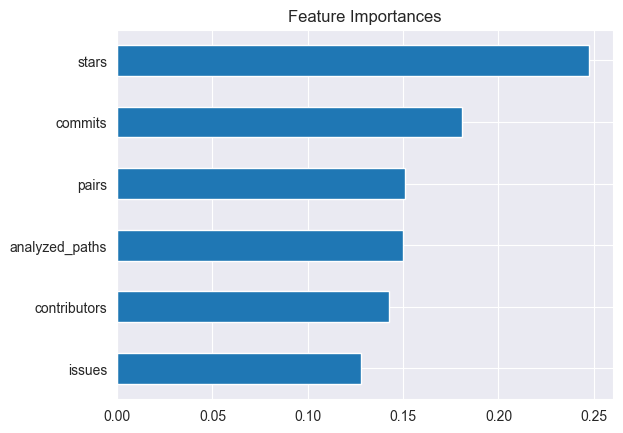

In [140]:
from sklearn.ensemble import RandomForestRegressor

X = df_nona[['stars', 'contributors', 'commits', 'pairs', 'analyzed_paths', 'issues']]
y = df_nona['similarities']

model = RandomForestRegressor(random_state=42)
model.fit(X, y)

feature_importances = pd.Series(model.feature_importances_, index=X.columns)

feature_importances.sort_values().plot(kind='barh')
plt.title('Feature Importances')
plt.show()

# Topic Distribution

In [143]:
topic_columns = [col for col in df.columns if 'topic' in col]

tdf = df_nona.copy()
tdf['max_value_topic'] = tdf[topic_columns].apply(lambda row: row.idxmax(), axis=1)
tdf['max_value_topic_amount'] = tdf[topic_columns].apply(lambda row: row.max(), axis=1)
# tdf.head()






,repo_id,analyzed_paths,pairs,similarities,issues,license,commits,created_at,contributors,stars,...,topics.topic_0,topics.topic_1,loc.blank,loc.code,loc.comment,loc.nFiles,topics.topic_2,topics.topic_4,max_value_topic,max_value_topic_amount
4,miekg/dns,39,741,1746.0,605.0,BSD-3-Clause,4173,2010-08-03,227.0,7661,...,0.071108,0.575756,3529,27510,2559,89,0.025523,0.208917,topics.topic_1,0.575756
12,go-gorp/gorp,17,136,415.0,236.0,MIT,554,2012-01-04,71.0,3706,...,0.172387,0.010458,1096,6161,855,28,0.017688,0.768748,topics.topic_4,0.768748
18,rcrowley/goagain,5,10,10.0,18.0,NOASSERTION,62,2011-08-27,4.0,2079,...,0.177857,0.277188,74,420,77,5,0.116817,0.188681,topics.topic_1,0.277188
24,dchest/captcha,2,1,7.0,31.0,MIT,155,2011-04-26,4.0,1838,...,0.194987,0.059188,205,11233,280,17,0.074361,0.641197,topics.topic_4,0.641197
32,kr/pretty,3,3,26.0,32.0,MIT,66,2011-01-14,21.0,1314,...,0.025353,0.025163,116,1206,93,7,0.025405,0.898281,topics.topic_4,0.898281


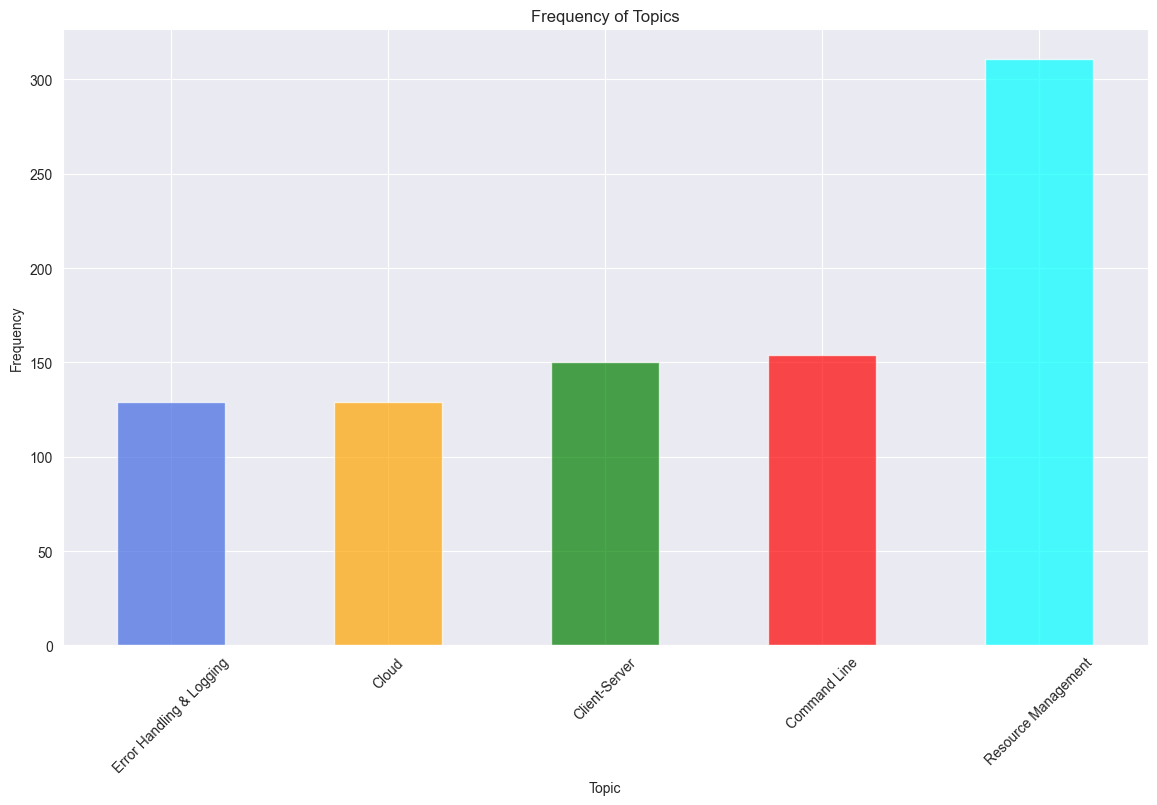

In [164]:
colors = ['royalblue', 'orange', 'green', 'red', 'cyan']
tdf_filtered = tdf[tdf['similarities'] > 1]
count_series = tdf_filtered['max_value_topic'].map(TOPICS).value_counts()
count_series = count_series.sort_values(ascending=True)
plt.figure(figsize=(14, 8))
count_series.plot(kind='bar', alpha=0.7, color=colors)
plt.xlabel('Topic')
plt.xticks(rotation=45)
plt.ylabel('Frequency')
plt.title('Frequency of Topics')
plt.show()
